In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Genera un dataset sintético que va a contener 800 instancias que representen personas. Cada persona va a tener los siguientes atributos:

- Valores de presión arterial y colesterol. Ten en cuenta que el nivel normal de colesterol se considera por debajo de 180, aunque puede variar entre 120 y 250, y el nivel normal de presión arterial sistólica se encuentra entre 100 y 120, aunque puede variar entre 70 y 180.
- Valores aleatorios de otro atributo que simule otros datos de la persona (pueden ser inventado)
- El valor inventado en nuestro caso es `Poder mágico` y un poder mágico por encima de `9000` te situa fuera de riesgo cardiaco.

In [66]:
# Generamos los datos
instancias = 800
# Presión arterial
min_pa = 70
max_pa = 180
umbral_pa = [100, 120]
min_cl = 120
max_cl = 250
umbral_cl = [180]
min_pm = 0
max_pm = 10000
umbral_pm = [9000]
pa = np.random.uniform(min_pa,max_pa, instancias)
cl = np.random.uniform(min_cl,max_cl, instancias)
pm = np.random.uniform(min_pm, max_pm, instancias)
peso_pa = 7
peso_cl = 5
peso_pm = 2
# El riesgo añadido será 0 hasta sobrepasar el umbral
data = pd.DataFrame({'Presión Arterial': pa, 'Colesterol': cl, 'Poder Mágico': pm})

# 2. Para cada instancia, calcula la probabilidad de tener problemas vasculares. Ten en cuenta las consideraciones sobre los valores de presión arterial y colesterol.

Supongamos que el riesgo es lineal una vez pasan los umbrales correspondientes

In [ ]:
def fun_risk_cl(cls, umbral_cl, min_cl, max_cl):
    risk = np.zeros_like(cls)
    for i, cl  in enumerate(cls):
        if cl < umbral_cl[0]:
            risk[i] = 0
        else:
            risk[i] = (cl - umbral_cl[0]) / (max_cl - umbral_cl[0])
    return risk

def fun_risk_pa(pas, umbral_pa, min_pa, max_pa):
    risk = np.zeros_like(pas)
    for i, pa in enumerate(pas):
        if pa < umbral_pa[0]:
            risk[i] = (umbral_pa[0] - pa) / (umbral_pa[0] - min_pa)
        elif umbral_pa[1] < pa:
            risk[i] = (pa - umbral_pa[1]) / (max_pa - umbral_pa[1])
        else:
            risk[i] = 0    
    return risk
def fun_risk_pm(pms, umbral_pm, min_pm, max_pm):
    """"
    Si tienes suficiente poder mágico eres inmune al riesgo cardiaco
    """
    risk = np.zeros_like(pms)
    for i, pm  in enumerate(pms):
        if pm > umbral_pm[0]:
            risk[i] = 0
        else:
            risk[i] = 1
    return risk

def fun_total_risk(risk_pa, risk_cl, risk_pm, peso_cl, peso_pa):
    return ((risk_pa * peso_pa + risk_cl * peso_cl) * risk_pm) / (peso_pa + peso_cl)

In [ ]:
total_risk = fun_total_risk(fun_risk_cl(cl,umbral_cl, min_cl, max_cl),
           fun_risk_pa(pa, umbral_pa, min_pa, max_pa),
           fun_risk_pm(pm, umbral_pm, min_pm, max_pm),
           peso_cl, peso_pa)
te_toco = np.random.binomial(1, 1/100, instancias)
no_te_toco = np.random.binomial(1, 1/200, size=instancias)


def si_te_toco_te_toco(total_risk, te_toco, no_te_toco, umbral_riesgo):
    """
    Añadimos una función para incluir un factor de resistencia que evita el
    riesgo cardiaco en una persona aunque tenga parámetros de riesgo
    Y un factor de predisposición que genera riesgo cardiaco aunque la persona
    se situase normalmente fuera de riesgo.
    """
    in_risk = np.zeros_like(total_risk)
    for i, risk in enumerate(total_risk):
        if te_toco[i] == 1:
            in_risk[i] = 1
        elif no_te_toco[i] == 1:
            in_risk[i] = 0
        else:
            in_risk[i] = total_risk[i] > umbral_riesgo
    return in_risk

# 3. En base a un umbral, para cada instancia (teniendo en cuenta la probabilidad calculada en el punto 2), determina la clase de tener riesgo cardiovascular (1) o no (0).

<Axes: xlabel='Poder Mágico', ylabel='Colesterol'>

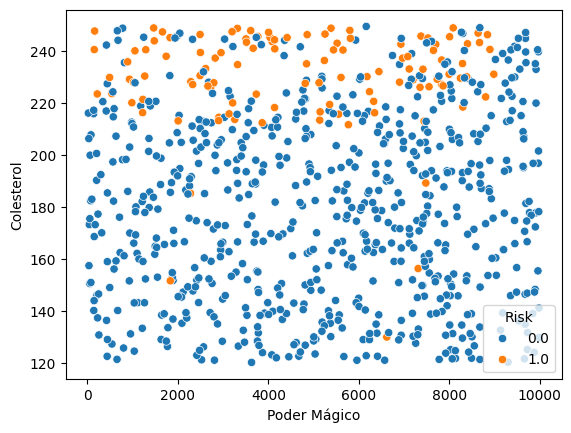

In [ ]:
umbral_riesgo = 0.6
risk = si_te_toco_te_toco(total_risk, te_toco,no_te_toco, umbral_riesgo)
data['Risk'] = risk

# 4. Dibuja la gráfica de los datos con respecto a la presión arterial (eje X por ejemplo) y el colesterol (eje Y por ejemplo). Muestra las predicciones utilizando diferentes dibujos para cada punto. Al mostrar los datos generados, observa si guardan cierta coherencia, para que sea posible al regresor aprender. Si lo necesitas, cambia los datos generados.

<Axes: xlabel='Poder Mágico', ylabel='Colesterol'>

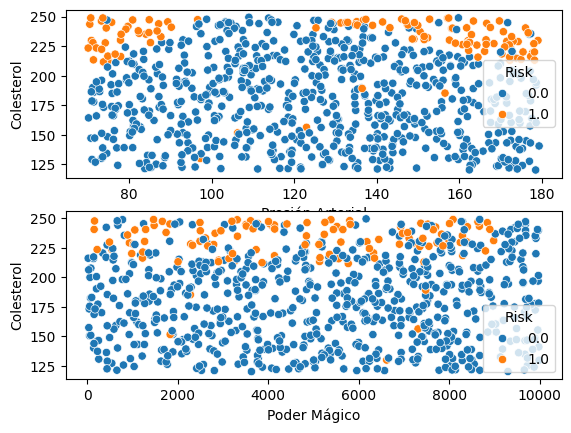

In [126]:
fig, axes = plt.subplots(2,1)
sns.scatterplot(data, x='Presión Arterial', y = 'Colesterol', hue='Risk', ax=axes[0])
sns.scatterplot(data, x='Poder Mágico', y = 'Colesterol', hue='Risk', ax=axes[1])

# 5. Entrena un regresor logístico (e.g. con clase LogisticRegression) con esos datos.

<Axes: xlabel='Presión Arterial', ylabel='Colesterol'>

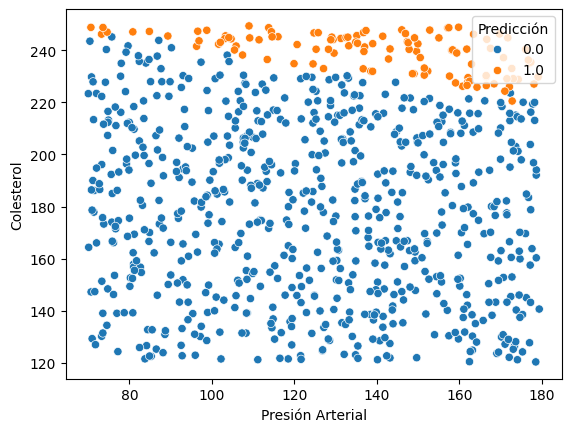

In [ ]:
model = LogisticRegression()
model.fit(data[['Presión Arterial', 'Colesterol', 'Poder Mágico']], data['Risk'])

# 6. Vuelve a dibujar la gráfica de los datos, dibujando también la curva de la regresión que separa las clases

<Axes: xlabel='Poder Mágico', ylabel='Colesterol'>

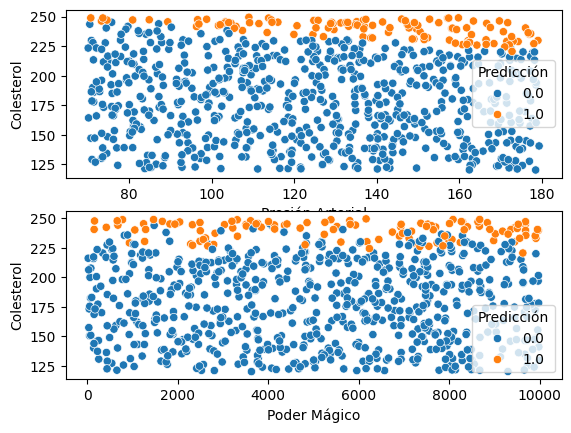

In [127]:
data['Predicción']= model.predict(data[['Presión Arterial', 'Colesterol', 'Poder Mágico']])
model.score(data[['Presión Arterial', 'Colesterol', 'Poder Mágico']], data["Risk"])
fig, axes = plt.subplots(2,1)
sns.scatterplot(data, x='Presión Arterial', y = 'Colesterol', hue='Predicción', ax=axes[0])
sns.scatterplot(data, x='Poder Mágico', y = 'Colesterol', hue='Predicción', ax=axes[1])

Este caso por los valores de umbral (más de uno) y por haber escogido una función escalón para la variable inventada el método de regresión lineal nos dará una predicción bastante mala, ya que sólo hara una separación por hiperplanos.

<Axes: xlabel='Presión Arterial', ylabel='Colesterol'>

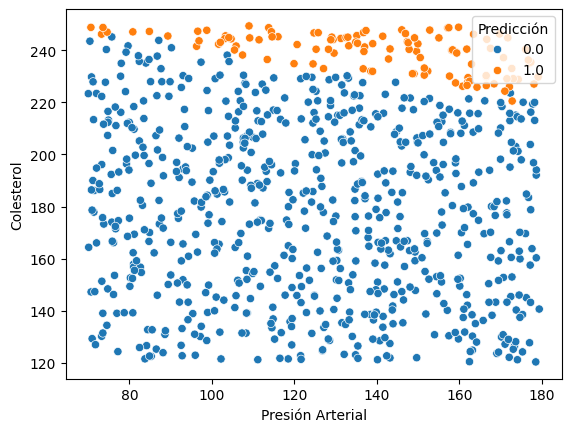

In [116]:
data['Predicción']= model.predict(data[['Presión Arterial', 'Colesterol', 'Poder Mágico']])
model.score(data[['Presión Arterial', 'Colesterol', 'Poder Mágico']], data["Risk"])
sns.scatterplot(data, x='Presión Arterial', y = 'Colesterol', hue='Predicción')

# 7. Genera regresión logística para otro conjunto de personas (500) instancias y dibuja la misma gráfica que en el punto 6. Compara el resultado de la gráfica obtenida con el nuevo conjunto de personas y con el conjunto de personas anterior.

<Axes: xlabel='Presión Arterial', ylabel='Colesterol'>

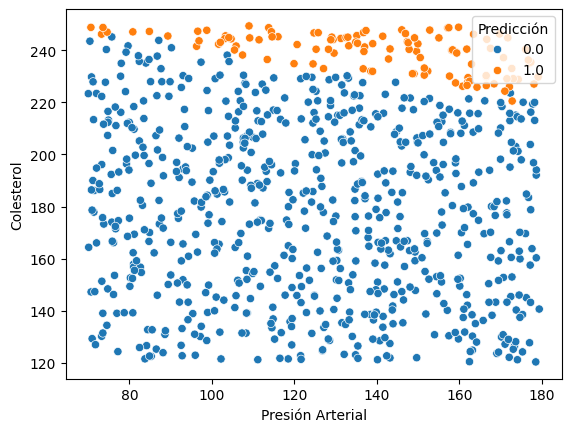

In [130]:
otro_pa = np.random.uniform(min_pa,max_pa, 500)
otro_cl = np.random.uniform(min_cl,max_cl, 500)
otro_pm = np.random.uniform(min_pm, max_pm, 500)
otro_data= pd.DataFrame({'Presión Arterial' : otro_pa, 'Colesterol' : otro_cl, 'Poder Mágico': otro_pm})
otro_data['Predicción']= model.predict(otro_data[['Presión Arterial', 'Colesterol', 'Poder Mágico']])
sns.scatterplot(data, x='Presión Arterial', y = 'Colesterol', hue='Predicción')

Vemos el mismo patrón exáctamente, puesto que el hiperplano es el mismo.

Deberiamos de usar otro método capaz de reflejar mejor el comportamiento de los datos.